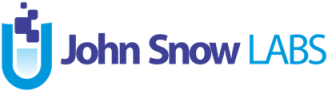

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/HuggingFaceHub_QA_Summarization_Testing_Notebook.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install "langtest[evaluate,langchain,transformers]"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [1]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

# Hugging Face Text-Generation Model Testing

In this section, we dive into testing of Hugging Face models in summarization.

## XSum-test-tiny dataset testing

### Setup and configure harness

In [21]:
harness = Harness(
    task="summarization",
    model={"model": "facebook/opt-1.3b", "hub":"huggingface"},
    data={"data_source" :"XSum",
          "split":"test-tiny"},
    config={
      'model_parameters': {
        'max_tokens': 32
      },

      'tests': {
        'defaults':{
          'min_pass_rate': 1.00
        },

        'robustness':{
          'lowercase': {'min_pass_rate': 0.70},
          'add_typo': {'min_pass_rate': 0.70}
        }
      }
    })

Test Configuration : 
 {
 "model_parameters": {
  "max_new_tokens": 32
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "lowercase": {
    "min_pass_rate": 0.7
   },
   "add_typo": {
    "min_pass_rate": 0.7
   }
  }
 }
}


We have specified task as summarization, hub as Hugging Face and model as `facebook/opt-1.3b`. Model can be accessed [here](https://huggingface.co/facebook/opt-1.3b)



For dataset we used `XSum` dataset and `test-tiny` split which includes 50 samples. Other available datasets are: [Benchmark Datasets](https://langtest.org/docs/pages/docs/data#summarization)

For tests we used lowercase and add_typo. Other available robustness tests for summarization task are:

* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

Available Bias tests for summarization task are:

* `replace_to_male_pronouns`
* `replace_to_female_pronouns`
* `replace_to_neutral_pronouns`
* `replace_to_high_income_country`
* `replace_to_low_income_country`
* `replace_to_upper_middle_income_country`
* `replace_to_lower_middle_income_country`
* `replace_to_white_firstnames`
* `replace_to_black_firstnames`
* `replace_to_hispanic_firstnames`
* `replace_to_asian_firstnames`
* `replace_to_white_lastnames`
* `replace_to_sikh_names`
* `replace_to_christian_names`
* `replace_to_hindu_names`
* `replace_to_muslim_names`
* `replace_to_inter_racial_lastnames`
* `replace_to_native_american_lastnames`
* `replace_to_asian_lastnames`
* `replace_to_hispanic_lastnames`
* `replace_to_black_lastnames`
* `replace_to_parsi_names`
* `replace_to_jain_names`
* `replace_to_buddhist_names`

Available Representation tests for summarization task are:

* `min_gender_representation_count`
* `min_ethnicity_name_representation_count`
* `min_religion_name_representation_count`
* `min_country_economic_representation_count`
* `min_gender_representation_proportion`
* `min_ethnicity_name_representation_proportion`
* `min_religion_name_representation_proportion`
* `min_country_economic_representation_proportion`


Available Accuracy tests for summarization task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`


Available Fairness tests for summarization task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

### Generating the Test Cases

In [22]:
harness.data = harness.data[:10]

In [23]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 6909.89it/s]


In [24]:
harness.testcases()

,category,test_type,original,test_case
0,robustness,lowercase,The ex-Reading defender denied fraudulent trad...,the ex-reading defender denied fraudulent trad...
1,robustness,lowercase,Voges was forced to retire hurt on 86 after su...,voges was forced to retire hurt on 86 after su...
2,robustness,lowercase,Seven photographs taken in the Norfolk country...,seven photographs taken in the norfolk country...
3,robustness,lowercase,"Chris Poole - known as ""moot"" online - created...","chris poole - known as ""moot"" online - created..."
4,robustness,lowercase,Four police officers were injured in the incid...,four police officers were injured in the incid...
5,robustness,lowercase,The injured pedestrian - a young man - is thou...,the injured pedestrian - a young man - is thou...
6,robustness,lowercase,Barca will be investigated for alleged misappr...,barca will be investigated for alleged misappr...
7,robustness,lowercase,"The think tank said the city's 1,536 schools n...","the think tank said the city's 1,536 schools n..."
8,robustness,lowercase,His 110 means he has scored 323 runs in a week...,his 110 means he has scored 323 runs in a week...
9,robustness,lowercase,Ms Kendall told the BBC Labour risked sending ...,ms kendall told the bbc labour risked sending ...


### Running the tests

In [25]:
harness.run()

Running testcases... : 100%|██████████| 20/20 [03:02<00:00,  9.14s/it]


### Generated Results

In [26]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,eval_score,pass
0,robustness,lowercase,The ex-Reading defender denied fraudulent trad...,the ex-reading defender denied fraudulent trad...,The ex-Reading defender denied fraudulent tra...,the ex-reading defender denied fraudulent tra...,0.978723,True
1,robustness,lowercase,Voges was forced to retire hurt on 86 after su...,voges was forced to retire hurt on 86 after su...,Voges was forced to retire hurt on 86 after s...,vernon morgan has been ruled out of the first ...,0.000000,False
2,robustness,lowercase,Seven photographs taken in the Norfolk country...,seven photographs taken in the norfolk country...,The duchess is seen looking relaxed and weari...,the duchess of cambridge is photographed in t...,0.416667,False
3,robustness,lowercase,"Chris Poole - known as ""moot"" online - created...","chris poole - known as ""moot"" online - created...","Â Chris Poole - known as ""moot"" online - creat...","ian schwartz - known as ""the hacker"" - is a fo...",0.044444,False
4,robustness,lowercase,Four police officers were injured in the incid...,four police officers were injured in the incid...,The man was arrested on suspicion of aggravat...,the man and boy were arrested after a police ...,0.072727,False
5,robustness,lowercase,The injured pedestrian - a young man - is thou...,the injured pedestrian - a young man - is thou...,The injured pedestrian - a young man - is tho...,the injured pedestrian - a young man - is tho...,0.981132,True
6,robustness,lowercase,Barca will be investigated for alleged misappr...,barca will be investigated for alleged misappr...,The Spanish judge has accepted a lawsuit from...,,0.000000,False
7,robustness,lowercase,"The think tank said the city's 1,536 schools n...","the think tank said the city's 1,536 schools n...","The think tank said the city's 1,536 schools ...","the think tank said the city's 1,536 schools ...",1.000000,True
8,robustness,lowercase,His 110 means he has scored 323 runs in a week...,his 110 means he has scored 323 runs in a week...,England batsman Roy was named man of the matc...,urn:nbn:nbn:nbn:nbn:nbn:nbn:nbn:nbn:nbn:nbn:,0.000000,False
9,robustness,lowercase,Ms Kendall told the BBC Labour risked sending ...,ms kendall told the bbc labour risked sending ...,ÂThe BBC's political correspondent Ross Hawkin...,Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â,0.000000,False


### Generate Report

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [27]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,lowercase,7,3,30%,70%,False
1,robustness,add_typo,1,9,90%,70%,True


# HF Model Testing For Question Answering

In this section, we dive into testing of HF models in question answering task.

## BoolQ-test-tiny dataset testing

### Setup and Configure Harness

In [2]:
harness = Harness(
    task="question-answering",
    model={"model": "facebook/opt-1.3b", "hub":"huggingface"},
    data={"data_source" :"BoolQ",
          "split":"test-tiny"},
    config={
      'model_parameters': {
        'max_tokens': 32
      },

      'tests': {
        'defaults':{
          'min_pass_rate': 1.00
        },

        'robustness':{
          'lowercase': {'min_pass_rate': 0.70},
          'add_typo': {'min_pass_rate': 0.70}
        }
      }
    })

Test Configuration : 
 {
 "model_parameters": {
  "max_new_tokens": 32
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "lowercase": {
    "min_pass_rate": 0.7
   },
   "add_typo": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [8]:
harness.data = harness.data[:3]

Here we have configured the harness to perform two robustness tests (lowercase and add_typo) and defined the minimum pass rate for each test.

And we just took the first 3 samples from data for this notebook since this model is fairly large and takes some time to run locally.

We have specified task as QA, hub as Hugging Face and model as `facebook/opt-1.3b`.

For dataset we used `BoolQ` dataset and `test-tiny` split which includes 50 samples. Other available datasets are: [Benchmark Datasets](https://langtest.org/docs/pages/docs/data#question-answering)

For tests we used lowercase and uppercase. Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

Available Bias tests for QA task are:

* `replace_to_male_pronouns`
* `replace_to_female_pronouns`
* `replace_to_neutral_pronouns`
* `replace_to_high_income_country`
* `replace_to_low_income_country`
* `replace_to_upper_middle_income_country`
* `replace_to_lower_middle_income_country`
* `replace_to_white_firstnames`
* `replace_to_black_firstnames`
* `replace_to_hispanic_firstnames`
* `replace_to_asian_firstnames`
* `replace_to_white_lastnames`
* `replace_to_sikh_names`
* `replace_to_christian_names`
* `replace_to_hindu_names`
* `replace_to_muslim_names`
* `replace_to_inter_racial_lastnames`
* `replace_to_native_american_lastnames`
* `replace_to_asian_lastnames`
* `replace_to_hispanic_lastnames`
* `replace_to_black_lastnames`
* `replace_to_parsi_names`
* `replace_to_jain_names`
* `replace_to_buddhist_names`


Available Representation tests for QA task are:

* `min_gender_representation_count`
* `min_ethnicity_name_representation_count`
* `min_religion_name_representation_count`
* `min_country_economic_representation_count`
* `min_gender_representation_proportion`
* `min_ethnicity_name_representation_proportion`
* `min_religion_name_representation_proportion`
* `min_country_economic_representation_proportion`



Available Accuracy tests for QA task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`


Available Fairness tests for QA task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `maxTokens:` Maximum number of output tokens allowed for model.

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'lowercase': {'min_pass_rate': 0.66, 'prob': 0.50},
        'uppercase':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```


### Generating the test cases.

In [9]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 6260.16it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

In [10]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,lowercase,20 euro note -- Until now there has been only ...,is the first series 20 euro note still legal t...,20 euro note -- until now there has been only ...,is the first series 20 euro note still legal t...
1,robustness,lowercase,2018–19 UEFA Champions League -- The final wil...,do the champions league winners get automatic ...,2018–19 uefa champions league -- the final wil...,do the champions league winners get automatic ...
2,robustness,lowercase,Bullsnake -- Bullsnakes are very powerful cons...,can a bull snake kill a small dog,bullsnake -- bullsnakes are very powerful cons...,can a bull snake kill a small dog
3,robustness,add_typo,20 euro note -- Until now there has been only ...,is the first series 20 euro note still legal t...,20 euro note -- Until now tuere has been only ...,is the flrst series 20 euro note still legal t...
4,robustness,add_typo,2018–19 UEFA Champions League -- The final wil...,do the champions league winners get automatic ...,2018–19 UEFA Champions League -- The final wil...,do the champions league winners gey automatic ...
5,robustness,add_typo,Bullsnake -- Bullsnakes are very powerful cons...,can a bull snake kill a small dog,Bullsnake -- Bullsnakes are very powerful cons...,can a bull snake kill a xmall dog


harness.testcases() method displays the produced test cases in form of a pandas data frame.

### Running the tests

In [11]:
harness.run()

Running testcases... : 100%|██████████| 6/6 [00:45<00:00,  7.61s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

In [12]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,lowercase,20 euro note -- Until now there has been only ...,is the first series 20 euro note still legal t...,20 euro note -- until now there has been only ...,is the first series 20 euro note still legal t...,\n\nI'm not sure if this is the right place to...,\n\nI'm not sure if this is the right place to...,False
1,robustness,lowercase,2018–19 UEFA Champions League -- The final wil...,do the champions league winners get automatic ...,2018–19 uefa champions league -- the final wil...,do the champions league winners get automatic ...,\n\nAnswer:\n\nThe Champions League winners wi...,\n\nAnswer:\n\nThe 2018–19 uefa champions leag...,False
2,robustness,lowercase,Bullsnake -- Bullsnakes are very powerful cons...,can a bull snake kill a small dog,bullsnake -- bullsnakes are very powerful cons...,can a bull snake kill a small dog,\n\nThe bot will be able to answer the questio...,\n\nI have a question about the bull snake. I ...,False
3,robustness,add_typo,20 euro note -- Until now there has been only ...,is the first series 20 euro note still legal t...,20 euro note -- Until now tuere has been only ...,is the flrst series 20 euro note still legal t...,\n\nI'm not sure if this is the right place to...,\n\nI'm not sure if this is the right place to...,False
4,robustness,add_typo,2018–19 UEFA Champions League -- The final wil...,do the champions league winners get automatic ...,2018–19 UEFA Champions League -- The final wil...,do the champions league winners gey automatic ...,\n\nAnswer:\n\nThe Champions League winners wi...,\n\nThe answer to the question is True.\n\nThe...,False
5,robustness,add_typo,Bullsnake -- Bullsnakes are very powerful cons...,can a bull snake kill a small dog,Bullsnake -- Bullsnakes are very powerful cons...,can a bull snake kill a xmall dog,\n\nThe bot will be able to answer the questio...,\n\nThe bot will be able to answer the questio...,False


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [13]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,lowercase,3,0,0%,70%,False
1,robustness,add_typo,3,0,0%,70%,False
